#Aprendizaje por refuerzo

Es un enfoque de aprendizaje automático, donde un agente aprende a realizar acciones en un entorno para maximizar una recompensa.

## Elementos

### Agente

El agente es la entidad que realiza acciones en un entorno. Puede ser un programa de computadora, un robot físico, o incluso un ser humano en algunos casos.

### Entorno:

El entorno es el contexto en el que el agente opera. Puede ser tan simple como un tablero de juego o tan complejo como el mundo real. El entorno responde a las acciones del agente.

### Estado:

En cada momento, el entorno se encuentra en un estado particular. El estado representa la configuración actual del entorno, y la información relevante para la toma de decisiones del agente.

### Acciones:

El agente puede realizar acciones en el entorno. Estas acciones afectan al entorno y pueden cambiar su estado. La elección de acciones es crucial para el rendimiento del agente.

### Episodio

Se refiere a una secuencia completa de interacciones entre un agente y su entorno, desde el estado inicial hasta la terminación. El episodio termina cuando se cumple alguna condición de terminación. Durante el episodio, se acumulan recompensas basadas en las acciones tomadas por el agente y el estado del entorno.

## Proceso de Aprendizaje:

El agente utiliza algoritmos de aprendizaje por refuerzo, para ajustar su política a medida que interactúa con el entorno. Estos algoritmos utilizan la retroalimentación en forma de recompensas para mejorar las decisiones del agente con el tiempo.


### Política:

La política es la estrategia que el agente utiliza para seleccionar acciones en un estado dado. El objetivo del agente es aprender una política óptima que maximice las recompensas a largo plazo.

### Recompensas:

Después de realizar una acción en un estado particular, el agente recibe una recompensa del entorno. La recompensa es una señal que indica cuán buena o mala fue la acción en términos del objetivo del agente. El objetivo del agente suele ser maximizar la recompensa acumulada a lo largo del tiempo.

### Exploración y Explotación:

Para aprender eficientemente, el agente debe equilibrar la exploración de nuevas acciones y la explotación de acciones conocidas que han dado buenas recompensas en el pasado. Este equilibrio es crucial para evitar quedarse atrapado en subóptimos locales.


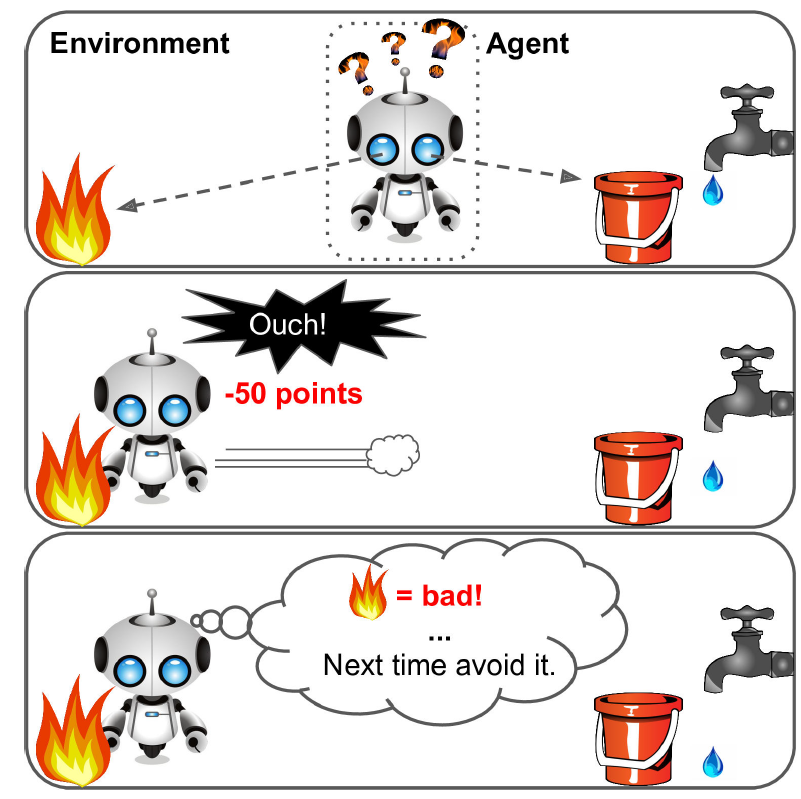

## Aplicaciones

### Juegos:
El aprendizaje por refuerzo ha tenido un gran éxito en juegos, desde juegos de mesa clásicos hasta videojuegos más complejos.

### Robótica:
Los robots pueden aprender a realizar tareas complejas mediante el aprendizaje por refuerzo. Esto incluye la manipulación de objetos, la navegación autónoma y la interacción con entornos dinámicos.

### Finanzas:
En finanzas, el aprendizaje por refuerzo se ha aplicado para la toma de decisiones en carteras de inversión, la optimización de estrategias comerciales y la gestión de riesgos.

### Salud:
En el ámbito de la salud, RL se ha aplicado para optimizar tratamientos médicos personalizados, la gestión de inventarios de suministros médicos y la planificación de rutas para la entrega de medicamentos.

### Optimización de Recursos:
En diversas industrias, como la gestión de recursos en centros de datos o la logística, RL se utiliza para optimizar la asignación de recursos y mejorar la eficiencia operativa.


## Método Actor-Critico

### 1. Objetivos del Actor y del Crítico:

- **Actor (Políticas):** El actor tiene como objetivo aprender una política que mapee los estados del entorno a distribuciones de probabilidad sobre las acciones posibles. En otras palabras, el actor aprende a seleccionar acciones en función de la observación actual del entorno.

- **Crítico (Función de Valor):** El crítico tiene como objetivo aprender una estimación de la función de valor. La función de valor estima la recompensa total esperada desde un estado dado hasta el final del episodio. Esta estimación se utiliza para evaluar la calidad de las acciones tomadas por el actor.

### 3. Entrenamiento:

- **Generación de Datos:** El agente interactúa con el entorno y recopila datos de entrenamiento, que incluyen estados, acciones, recompensas y estados futuros.

- **Cálculo de la Pérdida del Crítico:** Se calcula la pérdida del crítico utilizando la diferencia entre la estimación del crítico y las recompensas reales obtenidas a lo largo del tiempo.

- **Cálculo de la Pérdida del Actor:** La pérdida del actor se calcula utilizando la política del actor ponderada por la ventaja, donde la ventaja es la diferencia entre las recompensas reales y las estimaciones del crítico.


# Implementación

**Author:** [Apoorv Nandan](https://twitter.com/NandanApoorv)<br>
**Date created:** 2020/05/13<br>
**Last modified:** 2020/05/13<br>
**Description:** Implement Actor Critic Method in CartPole environment.

## Introducción

Este script muestra una implementación del método Actor-Critic en el entorno CartPole-V1.

### CartPole-V1

![Cart-Pole](https://gymnasium.farama.org/_images/cart_pole.gif)

Se une un poste a un carrito colocado en una pista sin fricción. El agente debe aplicar fuerza para mover el carrito. Se le recompensa por cada paso de tiempo en el que el poste se mantiene en posición vertical. El agente, por lo tanto, debe aprender a evitar que el poste se caiga.

### Referencias

- [CartPole](http://www.derongliu.org/adp/adp-cdrom/Barto1983.pdf)
- [Método Actor-Critic](https://hal.inria.fr/hal-00840470/document)

## Setup


In [ ]:
from IPython import display
import matplotlib.pyplot as plt
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
seed = 42
gamma = 0.99
max_steps_per_episode = 10000
env = gym.make("CartPole-v1", render_mode='rgb_array')
env.reset(seed=seed)
eps = np.finfo(np.float32).eps.item()


## Implementar la red Actor-Critic

Esta red aprende dos funciones:

1. Actor: Recibe como entrada el estado de nuestro entorno y devuelve un valor de probabilidad para cada acción en su espacio de acciones.
2. Crítico: Recibe como entrada el estado de nuestro entorno y devuelve una estimación de las recompensas totales en el futuro.

En nuestra implementación, comparten la capa inicial.

In [ ]:
num_inputs = 4
num_actions = 2
num_hidden = 128

inputs = layers.Input(shape=(num_inputs,), name="Entrada")
common = layers.Dense(num_hidden, activation="relu", name="Comun")(inputs)
action = layers.Dense(num_actions, activation="softmax", name="Action")(common)
critic = layers.Dense(1, name="Critic")(common)

model = keras.Model(inputs=inputs, outputs=[action, critic])


In [ ]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## Visualización del modelo sin entrenar

Vemos como se comportaría el actor con una politica sin entrenamiento.

In [ ]:
estado = env.reset()
total_recompensa = 0

while True:
    state = tf.convert_to_tensor(estado)
    state = tf.expand_dims(state, 0)
    action_probs, critic_value = model(state)
    action = np.random.choice(num_actions, p=np.squeeze(action_probs))

    estado, recompensa, hecho, _ = env.step(action)

    total_recompensa += recompensa

    img = env.render(mode='rgb_array')
    plt.imshow(img[0])
    plt.title(f"Total recompensa {total_recompensa}")
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # Pausa breve para visualización (ajusta el valor según sea necesario)
    #time.sleep(0.01)

    if hecho:
        print("Perdiste!")
        break


## Entrenamiento


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
huber_loss = keras.losses.Huber()
action_probs_history = []
critic_value_history = []
rewards_history = []
running_reward = 0
episode_count = 0

while True:  # Ejecutar hasta resolver
    state = env.reset()
    episode_reward = 0
    with tf.GradientTape() as tape:
        for timestep in range(1, max_steps_per_episode):

            state = tf.convert_to_tensor(state)
            state = tf.expand_dims(state, 0)

            # Predecir las probabilidades de acción y las recompensas futuras estimadas
            # a partir del estado del entorno
            action_probs, critic_value = model(state)
            critic_value_history.append(critic_value[0, 0])

            # Muestrear acción de la distribución de probabilidad de acciones
            action = np.random.choice(num_actions, p=np.squeeze(action_probs))
            action_probs_history.append(tf.math.log(action_probs[0, action]))

            # Aplicar la acción muestreada en nuestro entorno
            state, reward, done, _ = env.step(action)
            rewards_history.append(reward)
            episode_reward += reward

            if done:
                break

        # Actualizar recompensa para verificar la condición de resolución
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calcular el valor esperado a partir de las recompensas
        # - En cada paso de tiempo, ¿cuál fue la recompensa total recibida después de ese paso de tiempo?
        # - Las recompensas pasadas se descuentan multiplicándolas por gamma
        # - Estas son las etiquetas para nuestro crítico
        returns = []
        discounted_sum = 0
        for r in rewards_history[::-1]:
            discounted_sum = r + gamma * discounted_sum
            returns.insert(0, discounted_sum)

        # Normalizar
        returns = np.array(returns)
        returns = (returns - np.mean(returns)) / (np.std(returns) + eps)
        returns = returns.tolist()

        # Calcular valores de pérdida para actualizar nuestra red
        history = zip(action_probs_history, critic_value_history, returns)
        actor_losses = []
        critic_losses = []
        for log_prob, value, ret in history:
            # En este punto, el crítico estimó que obtendríamos una
            # recompensa total = `value` en el futuro. Tomamos una acción con probabilidad logarítmica
            # de `log_prob` y terminamos recibiendo una recompensa total = `ret`.
            # El actor debe actualizarse para que prediga una acción que conduzca a
            # altas recompensas (en comparación con la estimación del crítico) con alta probabilidad.

            diff = ret - value
            actor_losses.append(-log_prob * diff)  # actor loss

            # El crítico debe actualizarse para que prediga una mejor estimación de
            # las recompensas futuras.
            critic_losses.append(
                huber_loss(tf.expand_dims(value, 0), tf.expand_dims(ret, 0))
            )

        # Retropropagación
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Limpiar la historia de pérdidas y recompensas
        action_probs_history.clear()
        critic_value_history.clear()
        rewards_history.clear()

    # Registrar detalles
    episode_count += 1
    if episode_count % 10 == 0:
        template = "Recompensa Actual: {:.2f} en el episodio {}"
        print(template.format(running_reward, episode_count))

    if running_reward > 195:  # Condición para considerar la tarea resuelta
        print("Resuelto en el episodio {}!".format(episode_count))
        break


## Visualización del modelo entrenado


In [ ]:
estado = env.reset()
total_recompensa = 0

while True:
    state = tf.convert_to_tensor(estado)
    state = tf.expand_dims(state, 0)
    action_probs, critic_value = model(state)
    action = np.random.choice(num_actions, p=np.squeeze(action_probs))

    estado, recompensa, hecho, _ = env.step(action)

    total_recompensa += recompensa

    img = env.render(mode='rgb_array')
    plt.imshow(img[0])
    plt.title(f"Total recompensa {total_recompensa}")
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # Pausa breve para visualización (ajusta el valor según sea necesario)
    #time.sleep(0.01)

    if hecho:
        print("Perdiste!")
        break

    if total_recompensa > 100:
        print("Ganaste!")
        break
